In [209]:
import pandas as pd

# Load the Excel file to consider the headers in the second row
file_path = 'Bladder_Cancer_Survival_Data.xlsx'
df = pd.read_excel(file_path, header=1)

# Display the first few rows to verify the dataset
df.head()


Area Code   Area Type                        Region  \
0  E92000001     England                       England   
1  E92000001     England                       England   
2  E40000001  NHS Region              North of England   
3  E40000001  NHS Region              North of England   
4  E40000002  NHS Region  Midlands and East of England   

   Net Survival 2008-2010 (Men) - Patients  \
0                                  18859.0   
1                                      NaN   
2                                   5964.0   
3                                      NaN   
4                                   5800.0   

  Net Survival 2008-2010 (Men) - Years  Net Survival 2008-2010 (Men) - NS (%)  \
0                                  One                                   77.8   
1                                 Five                                   58.0   
2                                  One                                   78.9   
3                                 Five                                   59.4   
4                                  One                                   75.3   

   Net Survival 2008-2010 - 95% CI Lower  \
0                                   77.2   
1                                   57.1   
2                                   77.8   
3                                   57.7   
4                                   74.1   

   Net Survival 2008-2010 - 95% CI Upper  Net Survival 2003 (%)  \
0                                   78.5                   74.6   
1                                   58.9                   53.5   
2                                   80.0                   75.8   
3                                   61.0                   53.9   
4                                   76.5                   71.4   

   Net Survival 2004 (%)  Net Survival 2005(%)  Net Survival 2006 (%)  \
0                   74.3                  75.3                   74.7   
1                   53.8                  53.9                   53.1   
2                   74.5                  75.6                   74.0   
3                   53.1                  54.8                   52.3   
4                   73.6                  73.7                   74.9   

   Net Survival 2007 (%)  Net Survival 2008 (%)  Net Survival 2009 (%)  \
0                   75.1                   75.3                   75.5   
1                   53.4                   55.9                   55.0   
2                   75.0                   77.4                   76.8   
3                   56.0                   57.1                   57.8   
4                   75.3                   72.4                   74.4   

   Net Survival 2010 (%)  Annual Change in Net Survival (%)  \
0                   74.9                                0.1   
1                   53.0                                0.1   
2                   76.2                                0.3   
3                   54.7                                0.5   
4                   71.8                                0.0   

  Annual Change in Net Survival - p-value  
0                                    0.28  
1                                    0.42  
2                                    0.13  
3                                    0.06  
4                                    0.82

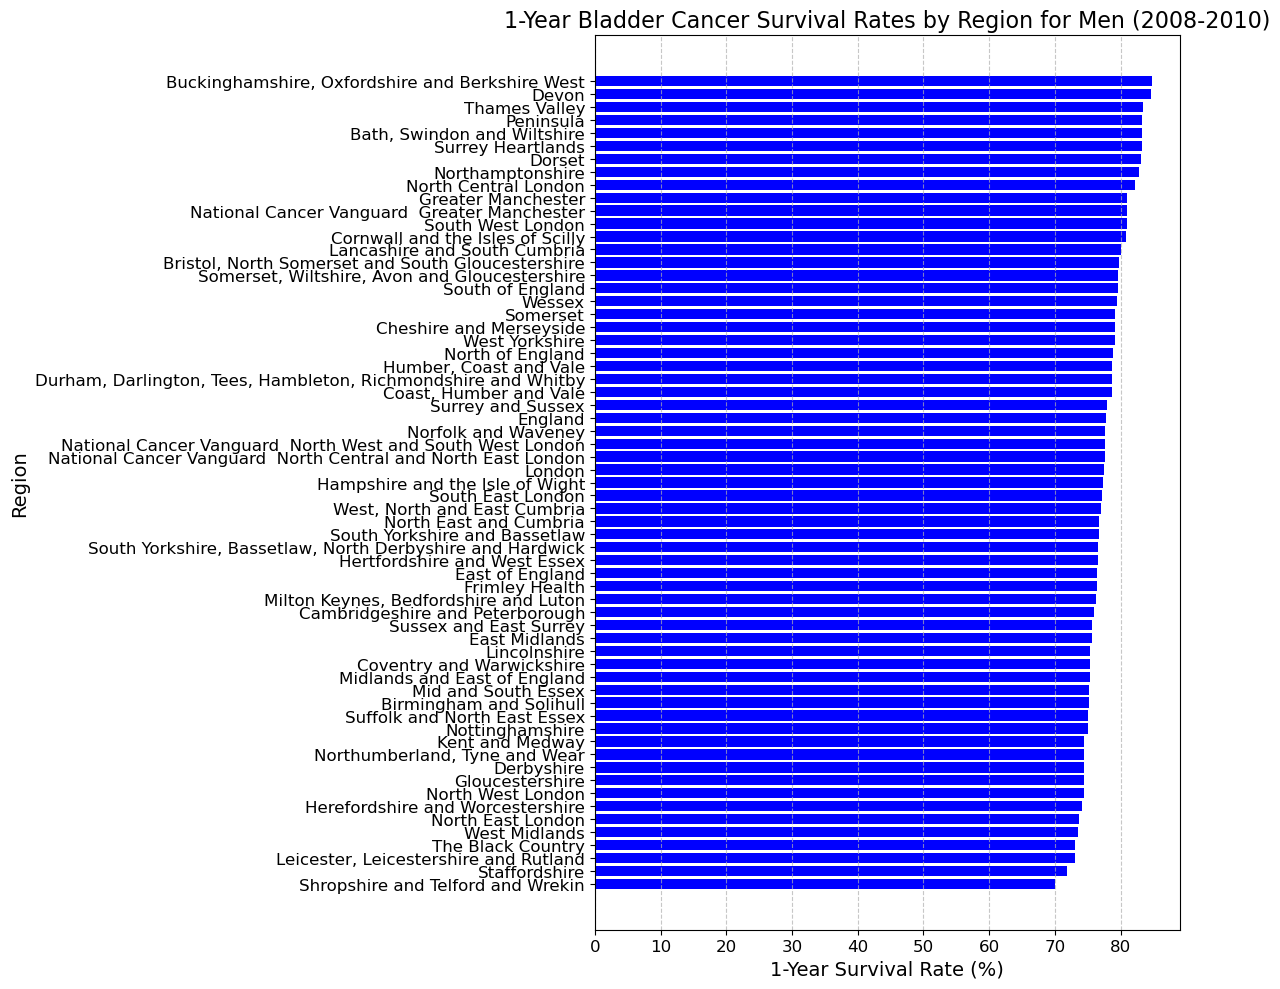

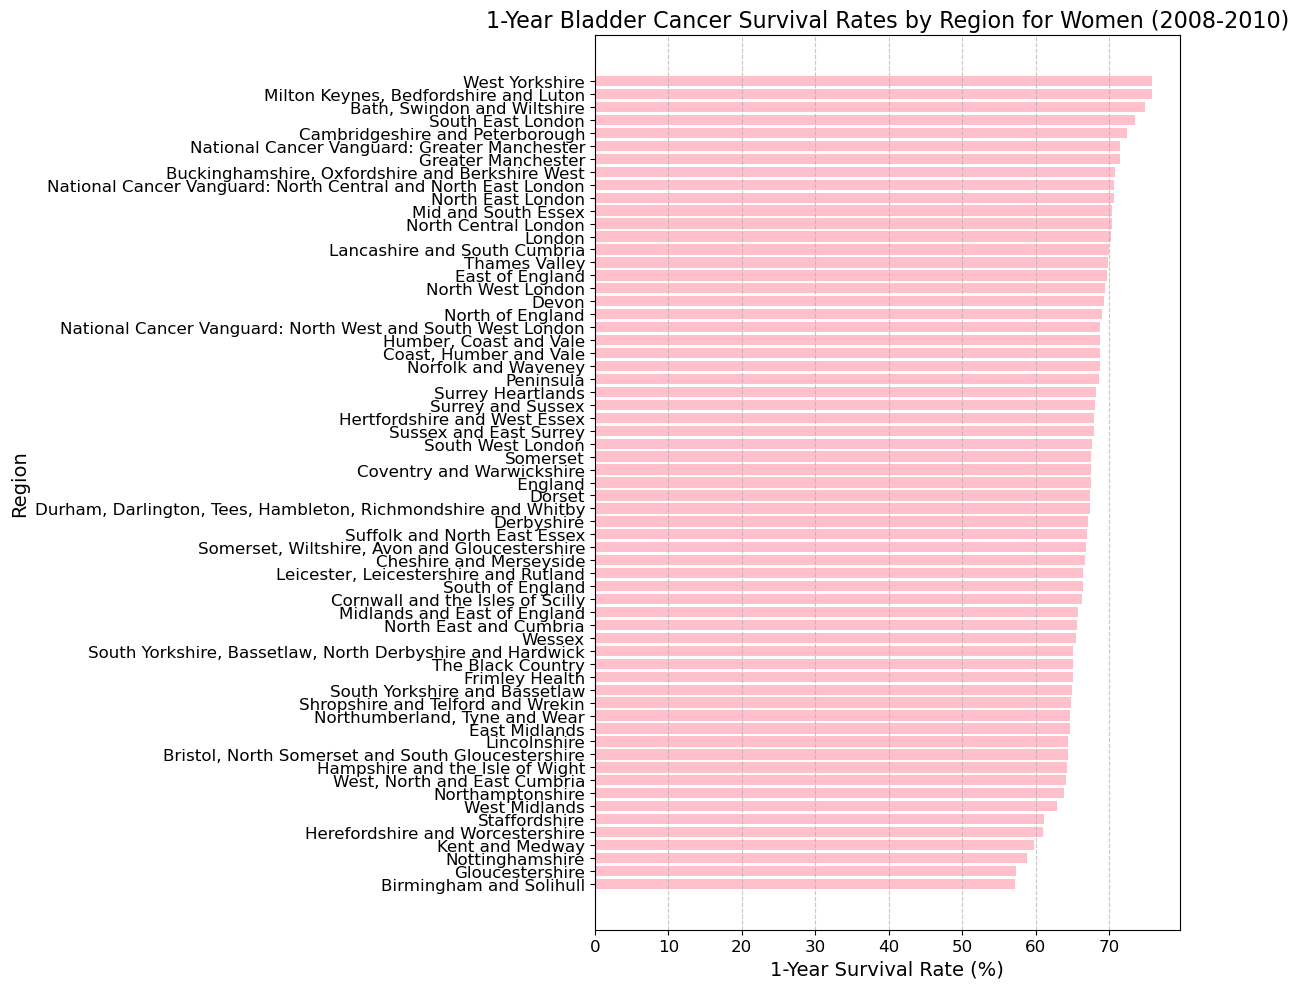

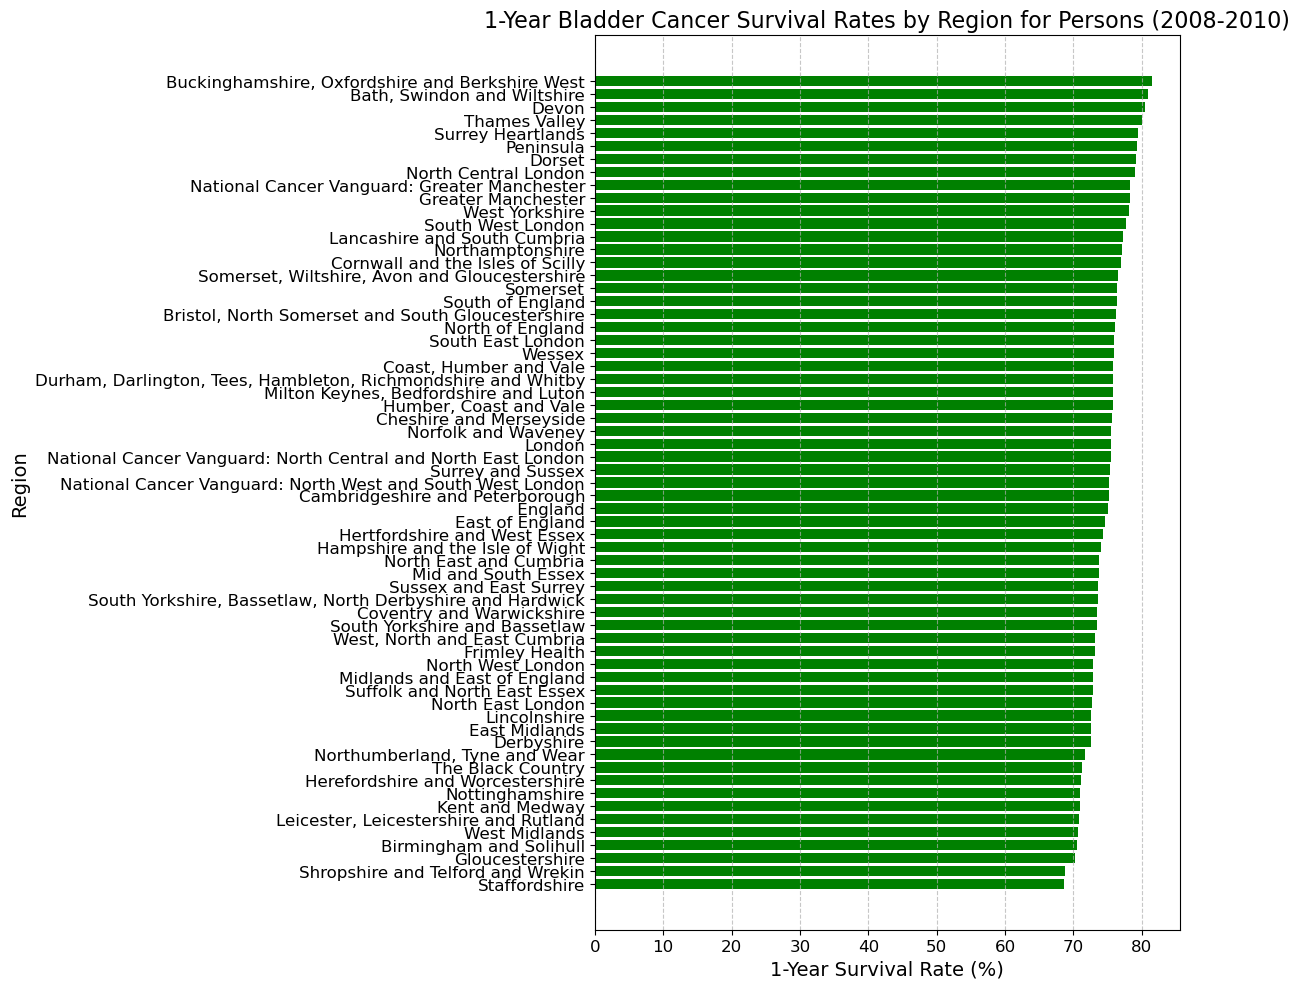

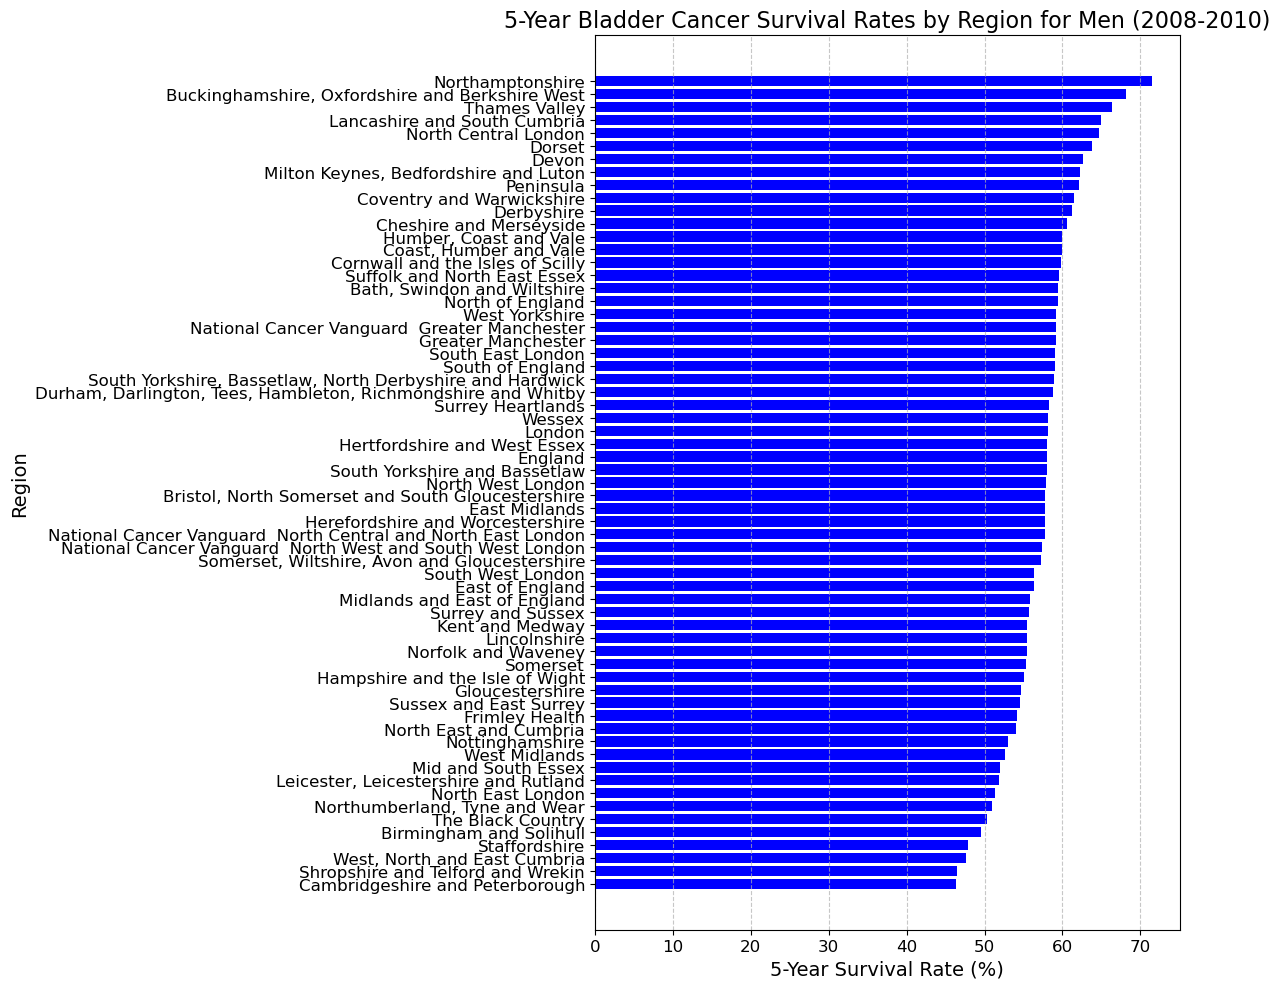

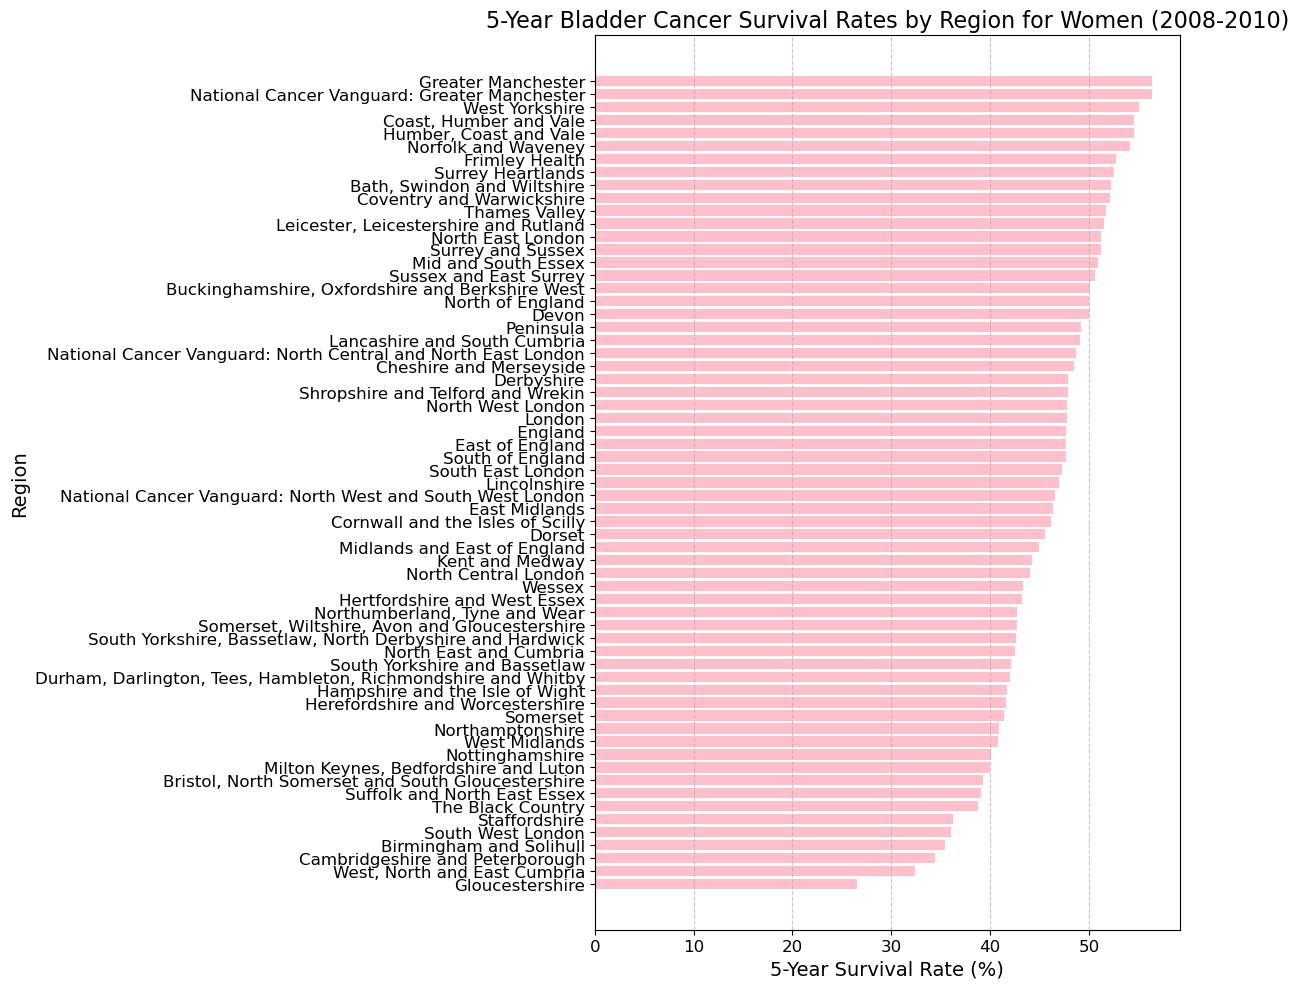

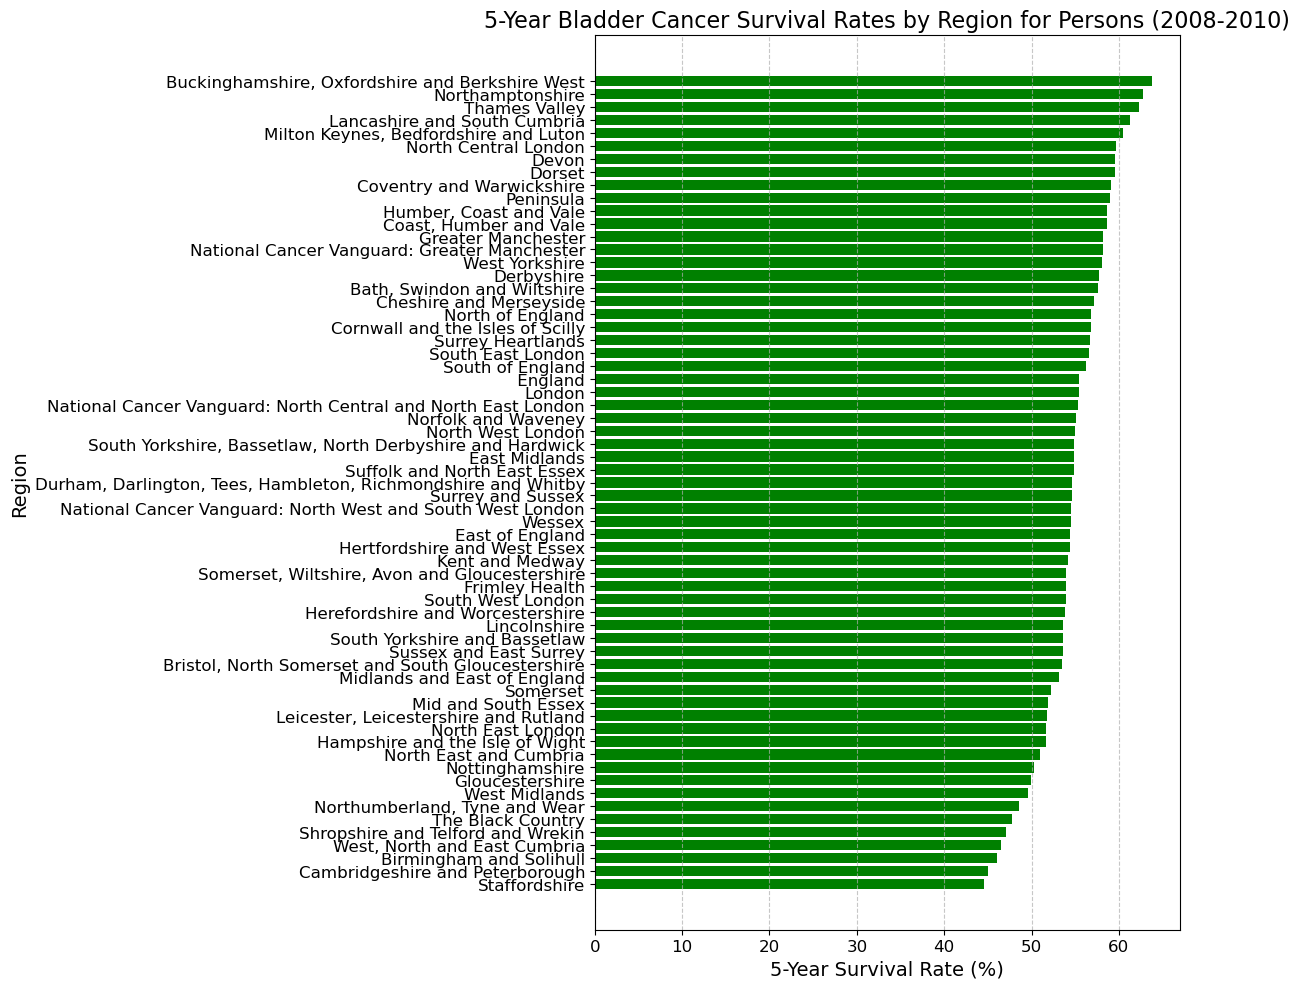

In [210]:
import pandas as pd
import matplotlib.pyplot as plt

# Strip any extra whitespace from the 'Years' column
df_men['Net Survival 2008-2010 (Men) - Years'] = df_men['Net Survival 2008-2010 (Men) - Years'].str.strip()
df_women['Net Survival 2008-2010 (Women) - Years'] = df_women['Net Survival 2008-2010 (Women) - Years'].str.strip()
df_persons['Net Survival 2008-2010 (Persons) - Years'] = df_persons['Net Survival 2008-2010 (Persons) - Years'].str.strip()

# Apply the filter for one year and five years after stripping whitespace
df_men_one_year = df_men[df_men['Net Survival 2008-2010 (Men) - Years'] == 'One']
df_women_one_year = df_women[df_women['Net Survival 2008-2010 (Women) - Years'] == 'One']
df_persons_one_year = df_persons[df_persons['Net Survival 2008-2010 (Persons) - Years'] == 'One']

df_men_five_year = df_men[df_men['Net Survival 2008-2010 (Men) - Years'] == 'Five']
df_women_five_year = df_women[df_women['Net Survival 2008-2010 (Women) - Years'] == 'Five']
df_persons_five_year = df_persons[df_persons['Net Survival 2008-2010 (Persons) - Years'] == 'Five']

# Function to create a bar chart with larger font sizes and different colors
def plot_survival_rate(df, gender, color, year_label):
    df_sorted = df.sort_values(by=f'Net Survival 2008-2010 ({gender}) - NS (%)', ascending=False)
    plt.figure(figsize=(12, 10))
    plt.barh(df_sorted['Region'], df_sorted[f'Net Survival 2008-2010 ({gender}) - NS (%)'], color=color)
    plt.xlabel(f'{year_label}-Year Survival Rate (%)', fontsize=14)
    plt.ylabel('Region', fontsize=14)
    plt.title(f'{year_label}-Year Bladder Cancer Survival Rates by Region for {gender.capitalize()} (2008-2010)', fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.gca().invert_yaxis()
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot for 1-Year Survival Rates
plot_survival_rate(df_men_one_year, 'Men', 'blue', '1')
plot_survival_rate(df_women_one_year, 'Women', 'pink', '1')
plot_survival_rate(df_persons_one_year, 'Persons', 'green', '1')

# Plot for 5-Year Survival Rates
plot_survival_rate(df_men_five_year, 'Men', 'blue', '5')
plot_survival_rate(df_women_five_year, 'Women', 'pink', '5')
plot_survival_rate(df_persons_five_year, 'Persons', 'green', '5')


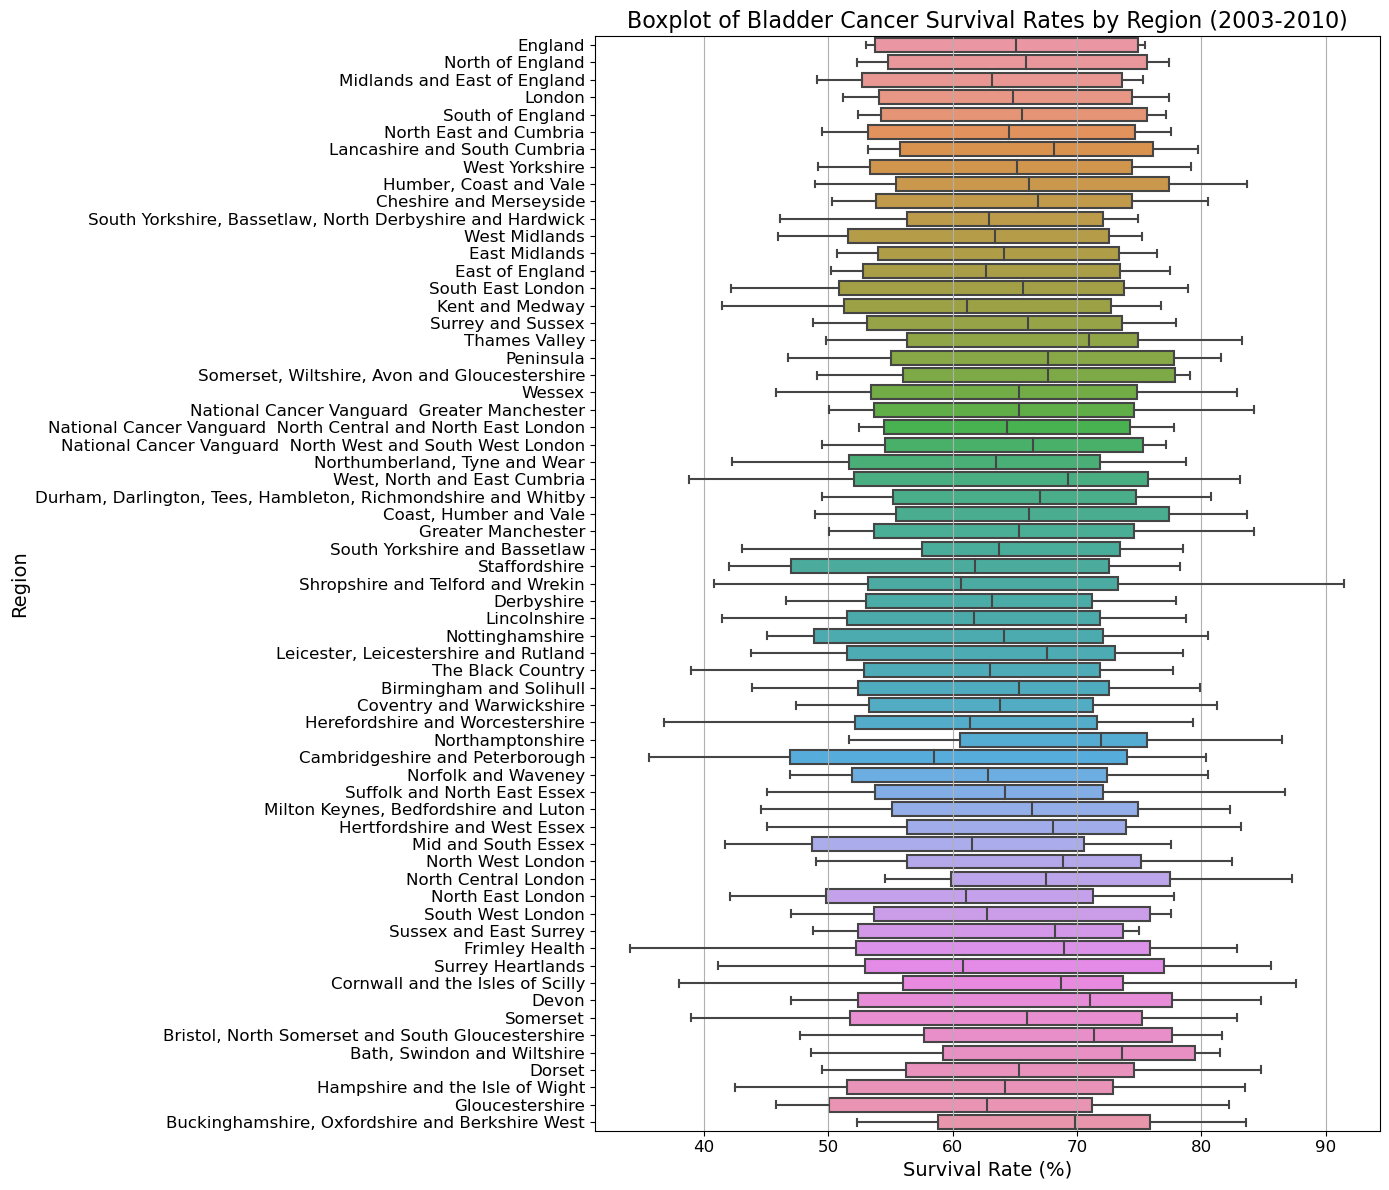

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correct value_vars based on your DataFrame column names
correct_value_vars = [
    'Net Survival 2003 (%)', 
    'Net Survival 2004 (%)', 
    'Net Survival 2005(%)', 
    'Net Survival 2006 (%)', 
    'Net Survival 2007 (%)', 
    'Net Survival 2008 (%)', 
    'Net Survival 2009 (%)', 
    'Net Survival 2010 (%)'
]

# Melt the DataFrame to make it suitable for seaborn boxplot
df_melted = df.melt(id_vars=['Region'], 
                    value_vars=correct_value_vars, 
                    var_name='Year', value_name='Survival Rate')

# Create the horizontal boxplot
plt.figure(figsize=(14, 12))
sns.boxplot(y='Region', x='Survival Rate', data=df_melted)
plt.title('Boxplot of Bladder Cancer Survival Rates by Region (2003-2010)', fontsize=16)
plt.ylabel('Region', fontsize=14)
plt.xlabel('Survival Rate (%)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='x')
plt.tight_layout()

plt.show()



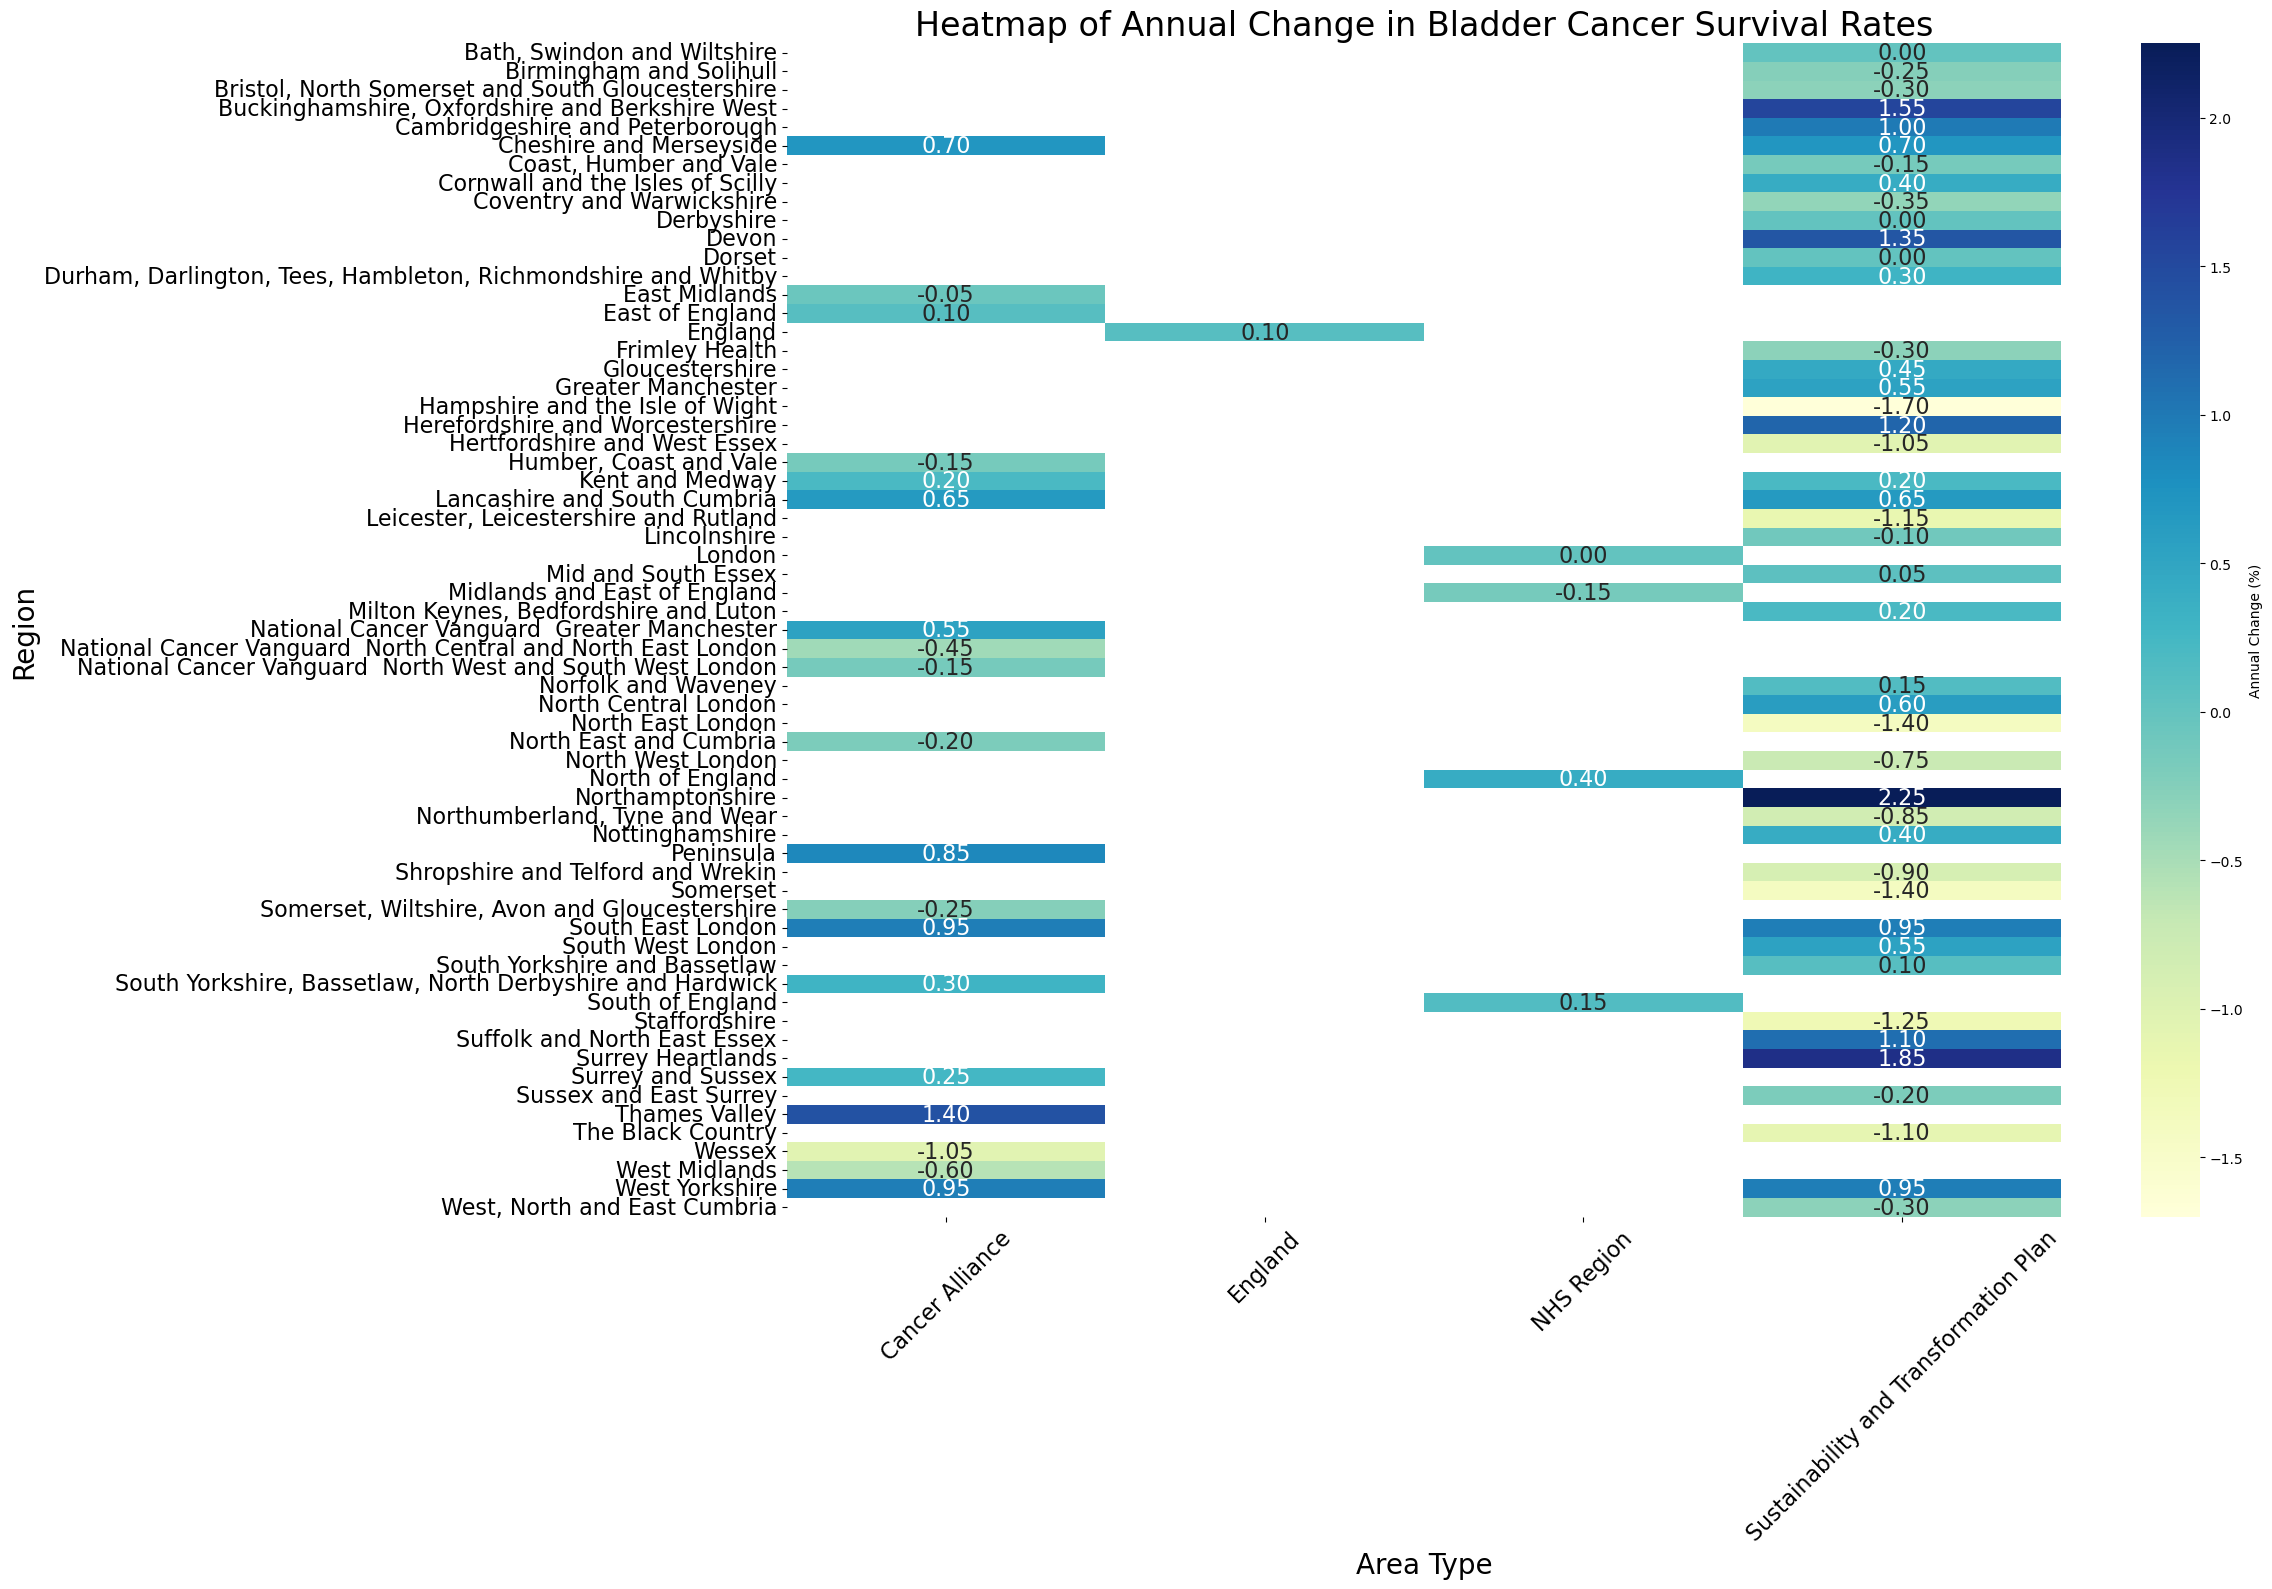

In [214]:

# Aggregate the data to handle duplicates
df_aggregated = df.groupby(['Region', 'Area Type']).mean().reset_index()

# Create a pivot table for the heatmap
pivot_table = df_aggregated.pivot(index='Region', columns='Area Type', values='Annual Change in Net Survival (%)')

# Increase the figure size for larger image
plt.figure(figsize=(24, 16))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".2f", annot_kws={"size": 16}, cbar_kws={'label': 'Annual Change (%)'})

# Add title and labels with larger fonts
plt.title('Heatmap of Annual Change in Bladder Cancer Survival Rates', fontsize=24)
plt.ylabel('Region', fontsize=20)
plt.xlabel('Area Type', fontsize=20)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)

# Tighten the layout to make to read properly
plt.tight_layout()

plt.show()





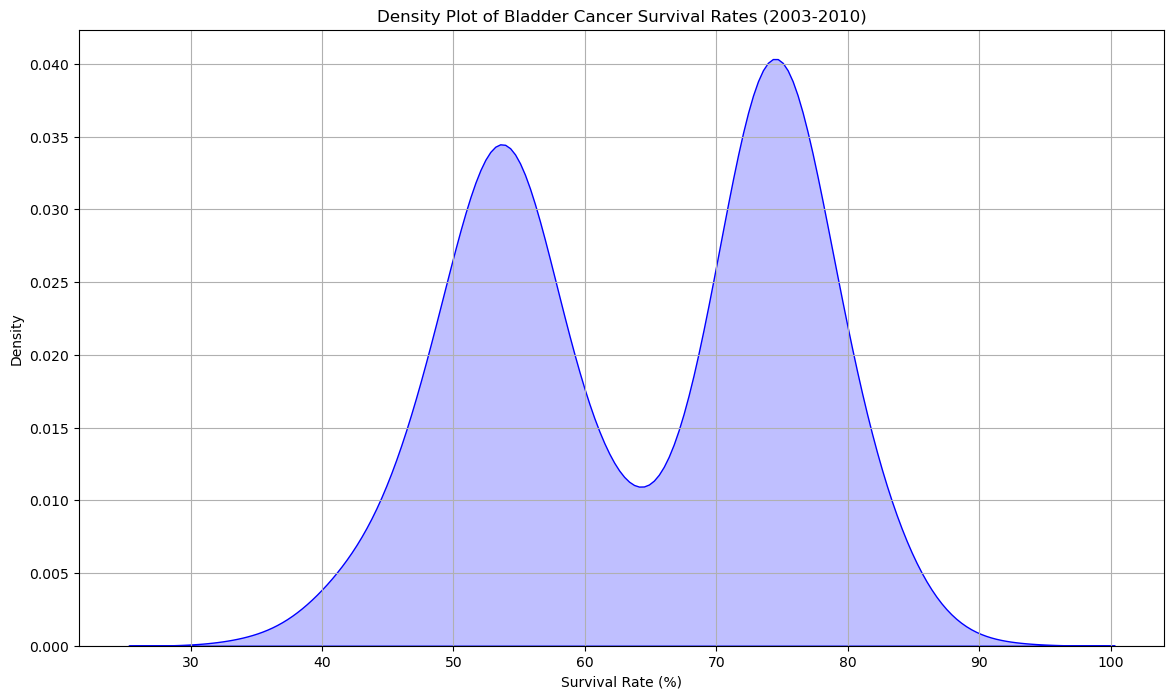

In [201]:
plt.figure(figsize=(14, 8))
sns.kdeplot(df_melted['Survival Rate'], shade=True, color='blue')
plt.title('Density Plot of Bladder Cancer Survival Rates (2003-2010)')
plt.xlabel('Survival Rate (%)')
plt.ylabel('Density')
plt.grid(True)
plt.show()


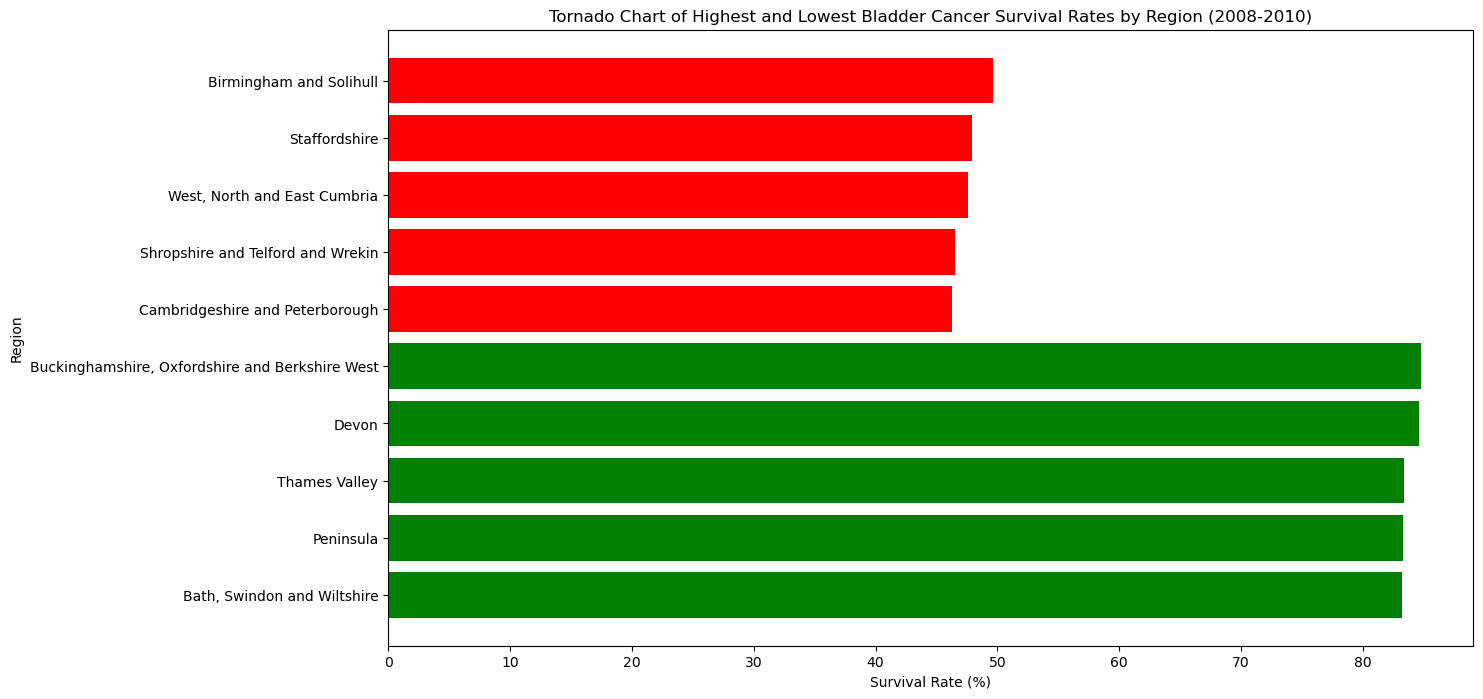

In [215]:
plt.figure(figsize=(14, 8))

# Sort and split data
sorted_df = df.sort_values(by='Net Survival 2008-2010 (Men) - NS (%)')
highs = sorted_df.tail(5)
lows = sorted_df.head(5)

# Graph the tornado chart
plt.barh(highs['Region'], highs['Net Survival 2008-2010 (Men) - NS (%)'], color='green')
plt.barh(lows['Region'], lows['Net Survival 2008-2010 (Men) - NS (%)'], color='red')
plt.title('Tornado Chart of Highest and Lowest Bladder Cancer Survival Rates by Region (2008-2010)')
plt.xlabel('Survival Rate (%)')
plt.ylabel('Region')
plt.show()


In [216]:
import plotly.express as px

# Prepare data
df_treemap = df[['Region', 'Net Survival 2008-2010 (Men) - NS (%)']]

# Graph treemap
fig = px.treemap(df_treemap, path=['Region'], values='Net Survival 2008-2010 (Men) - NS (%)', 
                 color='Net Survival 2008-2010 (Men) - NS (%)', color_continuous_scale='RdYlGn')

fig.update_layout(title='Tree Map of Bladder Cancer Survival Rates by Region (2008-2010)')
fig.show()


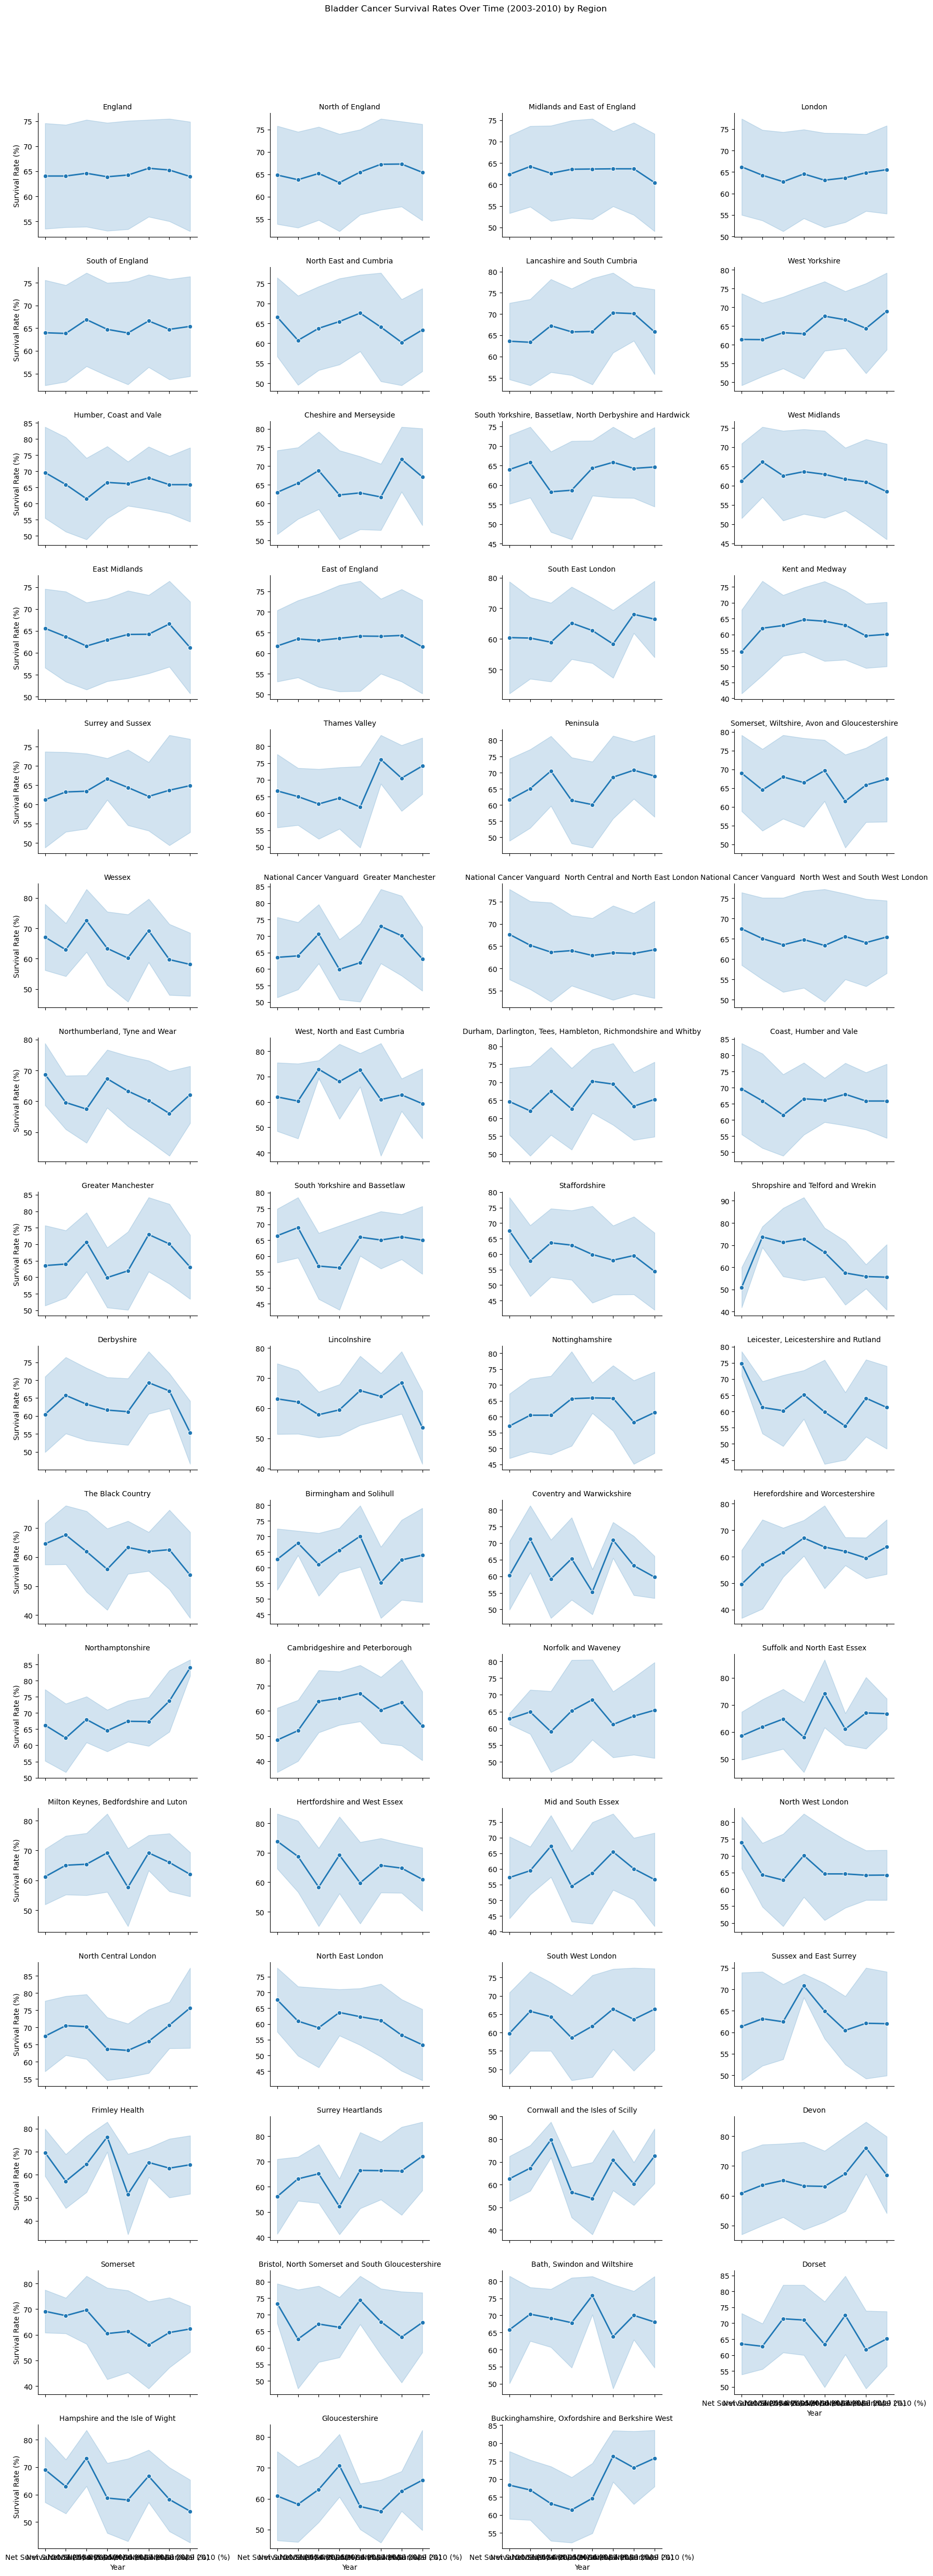

In [217]:
# Assume df_melted is the DataFrame with the melted data

# Create a FacetGrid to plot each region separately
g = sns.FacetGrid(df_melted, col="Region", col_wrap=4, height=3, aspect=1.5, sharey=False)

# Map the lineplot function onto the grid
g.map(sns.lineplot, "Year", "Survival Rate", marker="o", linewidth=2)

# Set the title and adjust the layout
g.fig.suptitle("Bladder Cancer Survival Rates Over Time (2003-2010) by Region", y=1.03)
g.set_axis_labels("Year", "Survival Rate (%)")
g.set_titles("{col_name}")
g.tight_layout()

plt.show()


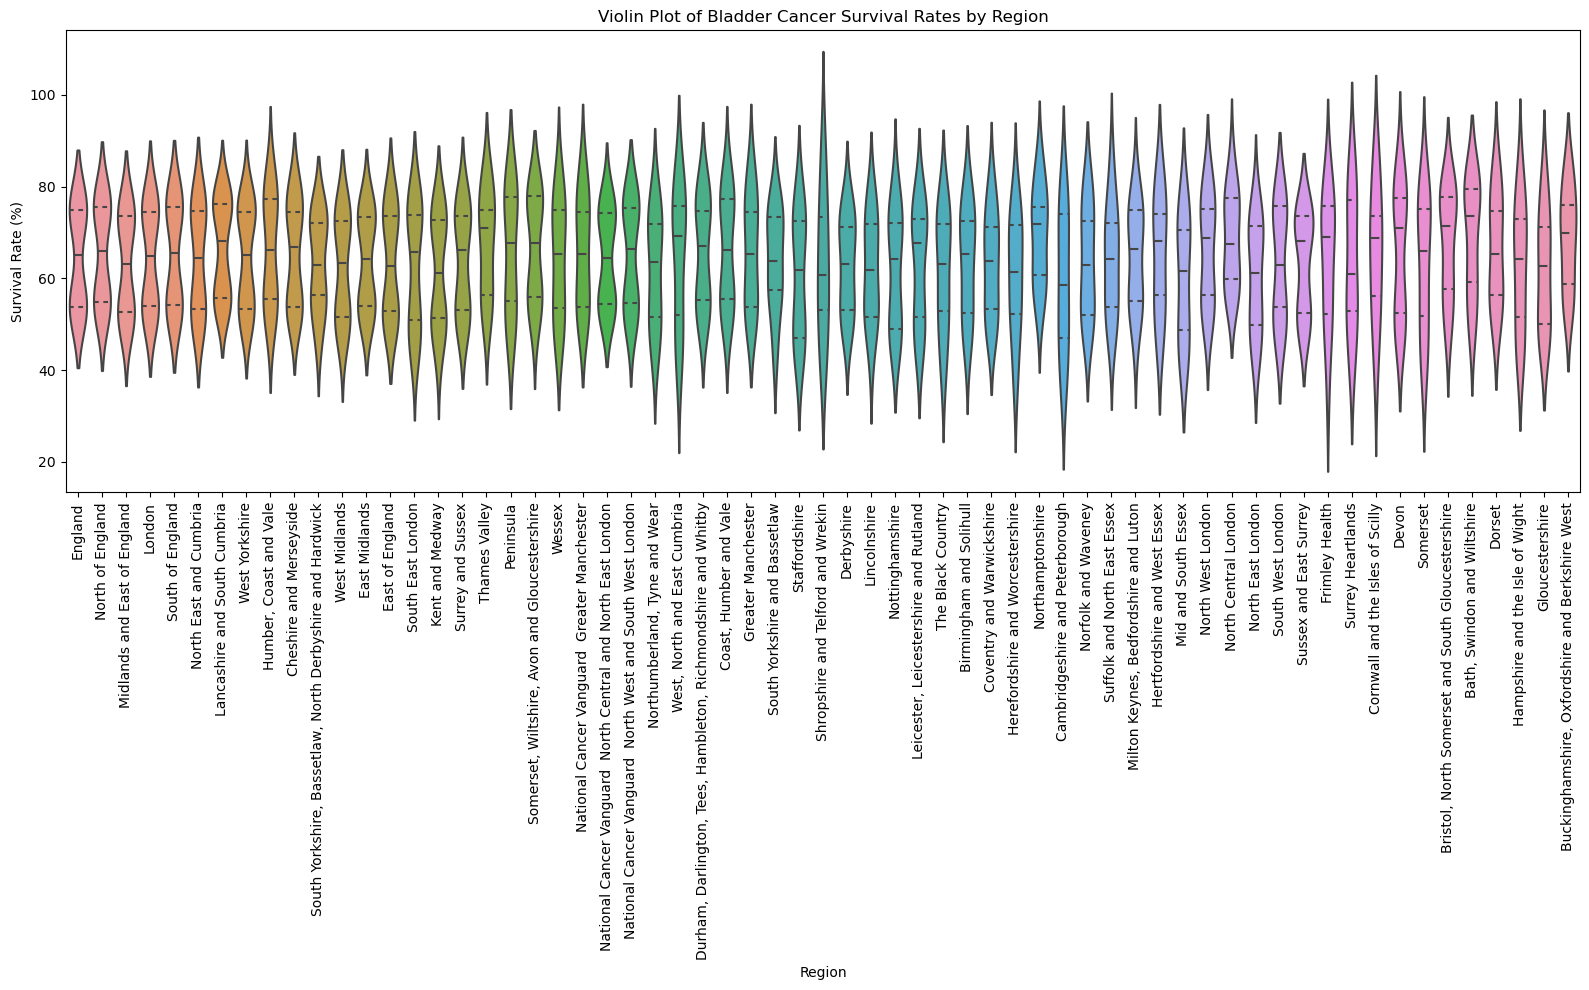

In [218]:

plt.figure(figsize=(16, 10))
sns.violinplot(x='Region', y='Survival Rate', data=df_melted, inner='quartile')
plt.title('Violin Plot of Bladder Cancer Survival Rates by Region')
plt.xlabel('Region')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [220]:
# Reload the 'F2.Bladder women' sheet with the correct header row
df_women = pd.read_excel('Bladder_Cancer_Survival_Data.xlsx', sheet_name='F2.Bladder women', header=1)

# Check the new column names
print(df_women.columns)


Index(['Area Code', 'Area Type', 'Region',
       'Net Survival 2008-2010 (Women) - Patients',
       'Net Survival 2008-2010 (Women) - Years',
       'Net Survival 2008-2010 (Women) - NS (%)',
       'Net Survival 2008-2010 - 95% CI Lower',
       'Net Survival 2008-2010 - 95% CI Upper', 'Net Survival 2003 (%)',
       'Net Survival 2004 (%)', 'Net Survival 2005 (%)',
       'Net Survival 2006 (%)', 'Net Survival 2007 (%)',
       'Net Survival 2008 (%)', 'Net Survival 2009 (%)',
       'Net Survival 2010 (%)', 'Annual Change in Net Survival (%)',
       'Annual Change in Net Survival - p-value'],
      dtype='object')


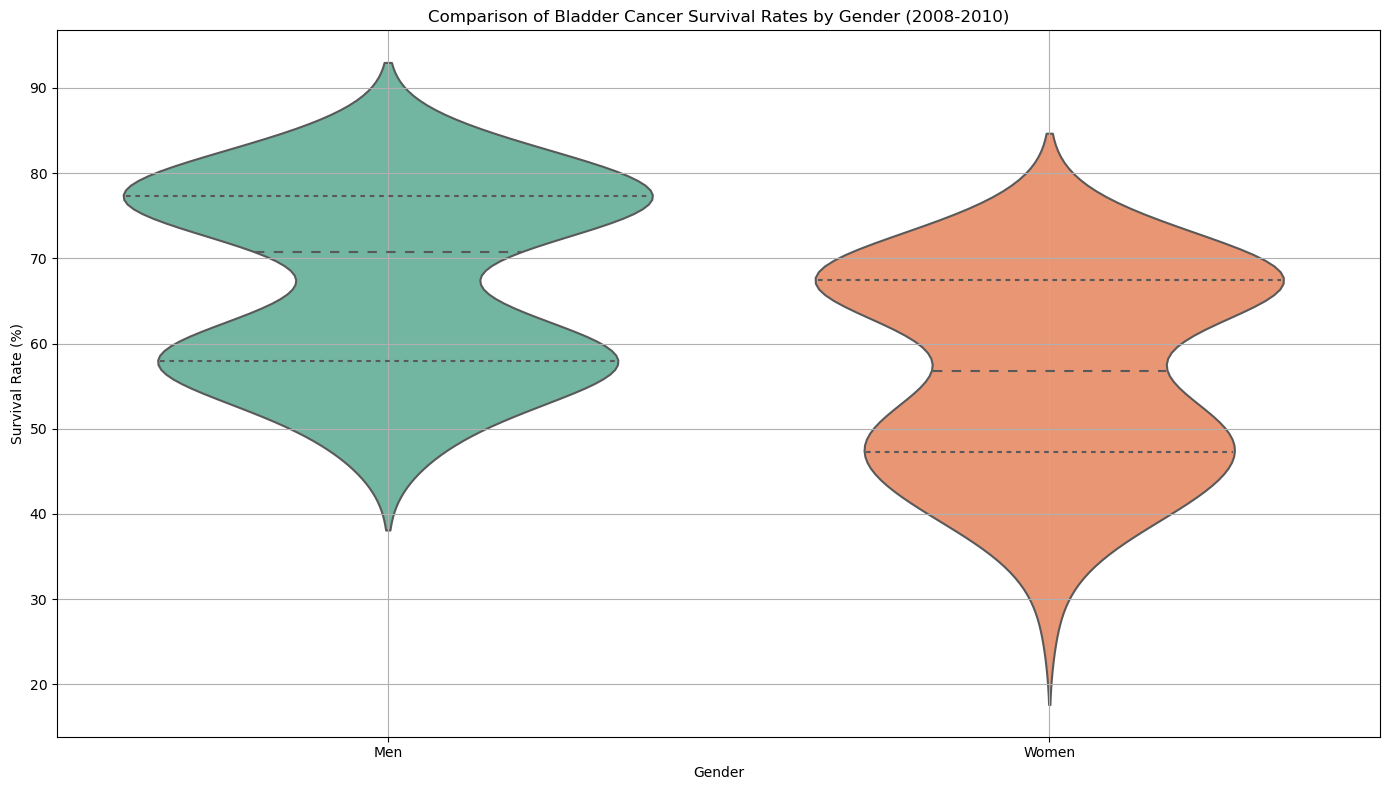

In [221]:

# Combine data from men and women for comparison
df_combined = pd.concat([
    df[['Region', 'Net Survival 2008-2010 (Men) - NS (%)']].rename(columns={'Net Survival 2008-2010 (Men) - NS (%)': 'Survival Rate'}).assign(Gender='Men'),
    df_women[['Region', 'Net Survival 2008-2010 (Women) - NS (%)']].rename(columns={'Net Survival 2008-2010 (Women) - NS (%)': 'Survival Rate'}).assign(Gender='Women')
])

# Plot the violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='Gender', y='Survival Rate', data=df_combined, inner='quartile', palette="Set2")
plt.title('Comparison of Bladder Cancer Survival Rates by Gender (2008-2010)')
plt.xlabel('Gender')
plt.ylabel('Survival Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


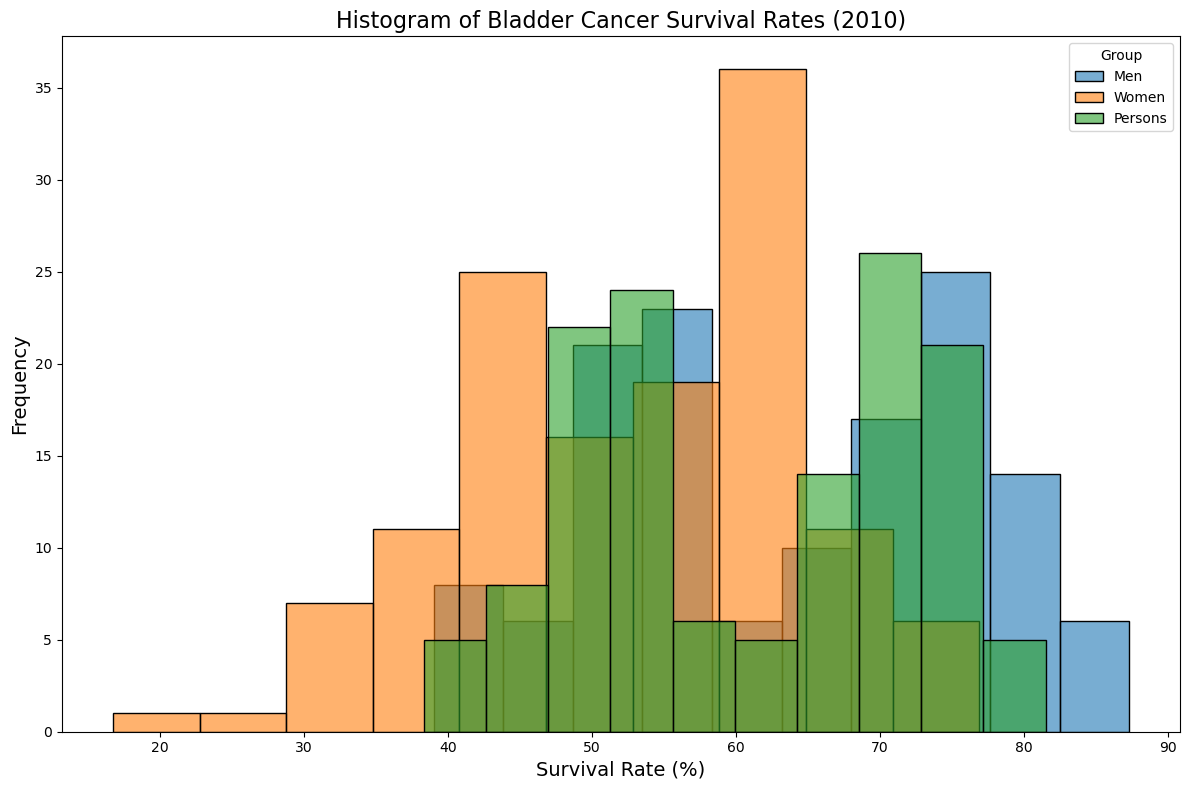

In [222]:

# Visualize the histogram
plt.figure(figsize=(12, 8))

# Graph for men
sns.histplot(df_hist['Men 2010'], kde=False, bins=10, color='#1f77b4', edgecolor='black', label='Men', alpha=0.6)

# Graph for women
sns.histplot(df_hist['Women 2010'], kde=False, bins=10, color='#ff7f0e', edgecolor='black', label='Women', alpha=0.6)

# Graph for persons
sns.histplot(df_hist['Persons 2010'], kde=False, bins=10, color='#2ca02c', edgecolor='black', label='Persons', alpha=0.6)

# Adding vertical lines to represent the height of each bar
bin_edges = plt.hist(df_hist['Men 2010'], bins=10, alpha=0)[1]  # Get bin edges

for i in range(len(bin_edges) - 1):
    height_men = df_hist['Men 2010'][(df_hist['Men 2010'] >= bin_edges[i]) & (df_hist['Men 2010'] < bin_edges[i + 1])].count()
    height_women = df_hist['Women 2010'][(df_hist['Women 2010'] >= bin_edges[i]) & (df_hist['Women 2010'] < bin_edges[i + 1])].count()
    height_persons = df_hist['Persons 2010'][(df_hist['Persons 2010'] >= bin_edges[i]) & (df_hist['Persons 2010'] < bin_edges[i + 1])].count()


# Enhancing the visual presentation
plt.title('Histogram of Bladder Cancer Survival Rates (2010)', fontsize=16)
plt.xlabel('Survival Rate (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Group')
plt.grid(False)  # Ensuring grid lines are off for a cleaner look
plt.tight_layout()


plt.show()
